Enter the number of charges to visualize:  4


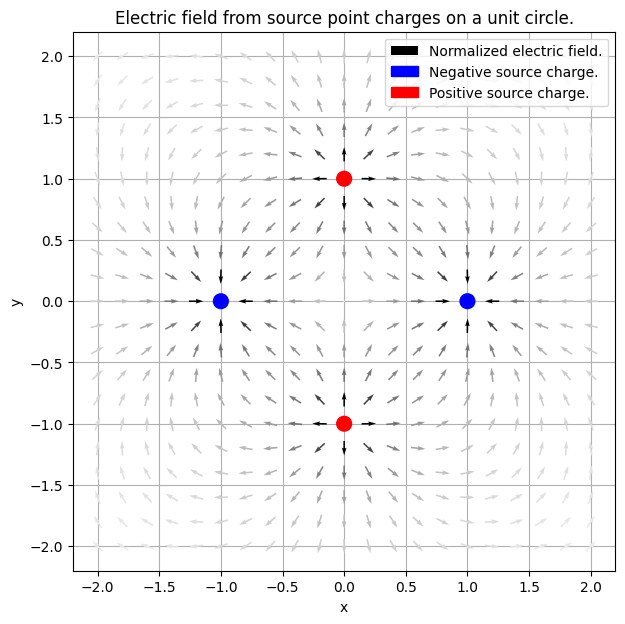

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

EPS = 1e-15

# define types
f64 = np.float64
vector2 = tuple[f64, f64]

def calc_electric_field_at(x, y, q: int, r0: vector2) -> vector2:
    """ Calculate the electric field of a point charge @param q located at @param r0 at point (@param x, @param y). """
    x0, y0 = r0
    
    # if x and y are obtained using np.meshgrid, Numpy will broadcast
    # the (1,) x0 and y0 to the shape of x and y respectively, effectively
    # finding the displacements at each (x, y)
    dx = x - x0
    dy = y - y0
    
    r = np.sqrt(dx ** 2 + dy ** 2)  

    # avoid singularity
    r[np.where(r <= EPS)] = np.nan
    
    with np.errstate(divide="ignore", invalid="ignore"):
        Ex = q * dx / r**3
        Ey = q * dy / r**3
    
    return Ex, Ey


def populate_unit_circle(n: int) -> list[tuple[int, tuple[f64, f64]]]:
    """ 
    Places and returns a list of source charges (@param n number) of alternating sign (starting with the negative charge)
    on a unit circule located at (0, 0) 
    """

    result = list()
    current_q: int = -1
    for i in range(0, n):
        x0: f64 = np.cos(2 * np.pi * i / n)
        y0: f64 = np.sin(2 * np.pi * i / n)
        
        result.append((current_q, (x0, y0)))
        current_q = -current_q

    return result

DENSITY = 21
x_vals = np.linspace(-2.0, 2.0, DENSITY)
y_vals = np.linspace(-2.0, 2.0, DENSITY)
X, Y = np.meshgrid(x_vals, y_vals)

Nq = int(input("Enter the number of charges to visualize: "))
charges = populate_unit_circle(n=Nq)

Ex = np.zeros_like(X)
Ey = np.zeros_like(Y)
for q, r0 in charges:
    Ex_current, Ey_current = calc_electric_field_at(X, Y, q, r0)

    Ex += Ex_current
    Ey += Ey_current

# remove small magnitudes of the field and normalize the field
E_magnitude = np.sqrt(Ex**2 + Ey**2)
Ex[np.where(E_magnitude <= EPS)] = 0.0
Ey[np.where(E_magnitude <= EPS)] = 0.0

Ex /= E_magnitude
Ey /= E_magnitude

fig, ax = plt.subplots(figsize=(7, 7))

# plot electric field (note: map the magnitude of electric field non-linearly to see more field lines)
ax.quiver(X, Y, Ex, Ey, E_magnitude ** (1/3), cmap="Greys", label=f"Normalized electric field.", pivot="mid", zorder=2)

# plot the source charges
CHARGE_RADIUS = 0.06
already_labeled = {
    'red': False,
    'blue': False
}
for (q, r0) in charges:
    color = 'red' if q > 0 else 'blue'
    circle = Circle(r0, CHARGE_RADIUS, color=color, zorder=3)

    if not already_labeled[color]:
        circle.set_label(f"{"Positive" if color == "red" else "Negative"} source charge.")
        already_labeled[color] = True

    ax.add_artist(circle)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Electric field from source point charges on a unit circle.")
ax.grid(zorder=1)
ax.legend()

plt.show()